#Getting started with Caffe

This class was created by Allison Gray and Jon Barker.

The following timer counts down to a five minute warning before the lab instance shuts down.  You should get a pop up at the five minute warning reminding you to save your work!  If you are about to run out of time, please see the [Post-Lab](#Post-Lab-Summary) section for saving this lab to view offline later.

<iframe id="timer" src="timer/timer.html" width="100%" height="120px"></iframe>

---
Before we begin, let's verify [WebSockets](http://en.wikipedia.org/wiki/WebSocket) are working on your system.  To do this, execute the cell block below by giving it focus (clicking on it with your mouse), and hitting Ctrl-Enter, or pressing the play button in the toolbar above.  If all goes well, you should see some output returned below the grey cell.  If not, please consult the [Self-paced Lab Troubleshooting FAQ](https://developer.nvidia.com/self-paced-labs-faq#Troubleshooting) to debug the issue.

In [1]:
print "The answer should be three: " + str(1+2)

The answer should be three: 3


Let's execute the cell below to display information about the GPUs running on the server.

In [2]:
!nvidia-smi

Fri Aug 28 15:12:17 2015       
+------------------------------------------------------+                       
| NVIDIA-SMI 346.46     Driver Version: 346.46         |                       
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GRID K520           On   | 0000:00:03.0     Off |                  N/A |
| N/A   50C    P8    17W / 125W |     10MiB /  4095MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

##Introduction

[Caffe](http://caffe.berkeleyvision.org/) is a deep learning framework developed by the Berkely Vision and Learning Center (BVLC) and community contributors.  Caffe is released under the BSD 2-Clause license.  Caffe emphasizes easy application of deep learning. All neural networks and optimization parameters are defined by configuration files without any hard-coding and Caffe offers a command line interface as well as scripting interfaces in Python and MATLAB.  Caffe is fast due it's C++ and CUDA foundation, but the code is extensible fostering active development.  There is a large open-source community contributing many significant changes and state-of-the-art features back into Caffe.  Neural networks trained using Caffe are also saved into a well-defined binary format that makes them easy to share - in fact, there is a model zoo hosted [here](https://github.com/BVLC/caffe/wiki/Model-Zoo) where you can download cutting edge pre-trained neural networks.

The objectives of this class are to learn how to complete the following tasks in Caffe:

1. Build and train a convolutional neural network (CNN) for classifying images.
2. Evaluate the classification performance of a trained CNN under different training parameter configurations.
3. Modify the network configuration to improve classification performance.
3. Visualize the features that a trained network has learned.
4. Classify new test images using a trained network.

This is an introductory class and is part of NVIDIA's five class Introduction to Deep Learning course.  It is assumed that you have completed the previous modules "Introduction to Deep Learning" and "Getting Started with DIGITS interactive training system for image classification" before starting this class.

##Training and Classifying with Caffe

You are provided with a subset of the [ImageNet](http://www.image-net.org/) dataset.  The images are from two different categories, cats and dogs.  Below are sample images from both categories.  The cats category includes domestic cats as well as large breeds like lions and tigers.  The dog category is comprised of domestic dogs including pugs, basenji and great pyrenees.  There are approximately 13,000 images in total.

![](files/src/cat1.png)
![](files/src/cat2.png)
![](files/src/dog1.png)
![](files/src/dog2.png)

In this class we will be creating and training a deep neural network in Caffe that can accurately classify images from these two categories, i.e. can label an image of a dog as "dog" and an image of a cat as "cat".

##Task 1 - Creating a Database and Mean Image

Before we train a neural network using Caffe we will move the training and validation images into a database.  The database allows Caffe to efficiently iterate over the image data during training.  The training and validation datasets are independent subsets of the original image dataset.  We will train the network using the training dataset and then test the networks performance using the validation dataset; that way we can be sure that the network performs well for images that it has never been trained on.

To minimize the training time during this class we have resized all of the images to 32x32 pixels for you.  The image files can be located anywhere on the filesystem.  Caffe knows which images belong to the training and validation sets and which class each image belongs to by referring to text files `train.txt` and `val.txt`.  These files simply list the relative filename of each image tab seperated from a natural number representing the class the image belongs to.  For example, `train.txt` contains the following rows:

We also create a mean image from the training data. This is the image obtained by taking the mean value of each pixel across all of the training dataset images.  We do this so that we can extract that mean image from each training and validation image before it is fed into the neural network.  This is an important pre-processing step for achieving fast and effective training.  It has the effect of removing the average brightness (intensity) of each point in the image so that the network learns about image content rather than illumination conditions.

We complete each of these tasks using command line tools that come with Caffe.  A number of useful utilities for data pre-processing, network training and network deployment can be found in the Caffe installation folder in `$CAFFE_ROOT/build/tools`

Execute the cell below to create a mean image of the training data. (_Note_: you can ignore the "Failed to initialize libdc1394" warning messages in the output)

You will know the lab is processing when you see a solid circle in the top-right of the window that looks like this: ![](jupyter_executing.png)
Otherwise, when it is idle, you will see the following: ![](jupyter_idle.png)
If you ever feel like a cell has run for to long, you can stop it with the stop button in the toolbar.
For troubleshooting, please see [Self-paced Lab Troubleshooting FAQ](https://developer.nvidia.com/self-paced-labs-faq#Troubleshooting) to debug the issue.


In [3]:
%%bash

rm -rf train_lmdb val_lmdb

#Setup environment variables
TOOLS=/home/ubuntu/caffe/build/tools
TRAIN_DATA_ROOT=/home/ubuntu/data/dog_cat/dog_cat_32/train/
VAL_DATA_ROOT=/home/ubuntu/data/dog_cat/dog_cat_32/val/

#Create the training database
$TOOLS/convert_imageset \
--shuffle \
$TRAIN_DATA_ROOT \
$TRAIN_DATA_ROOT/train.txt \
train_lmdb

#Create the validation database
$TOOLS/convert_imageset \
--shuffle \
$VAL_DATA_ROOT \
$VAL_DATA_ROOT/val.txt \
val_lmdb

#Create the mean image database
$TOOLS/compute_image_mean train_lmdb mean.binaryproto

E0828 15:13:31.193488  2814 convert_imageset.cpp:143] Processed 1000 files.
E0828 15:13:32.258235  2814 convert_imageset.cpp:143] Processed 2000 files.
E0828 15:13:33.201022  2814 convert_imageset.cpp:143] Processed 3000 files.
E0828 15:13:34.090423  2814 convert_imageset.cpp:143] Processed 4000 files.
E0828 15:13:35.128525  2814 convert_imageset.cpp:143] Processed 5000 files.
E0828 15:13:36.202548  2814 convert_imageset.cpp:143] Processed 6000 files.
E0828 15:13:37.077045  2814 convert_imageset.cpp:143] Processed 7000 files.
E0828 15:13:38.085916  2814 convert_imageset.cpp:143] Processed 8000 files.
E0828 15:13:39.035594  2814 convert_imageset.cpp:143] Processed 9000 files.
E0828 15:13:39.914156  2814 convert_imageset.cpp:143] Processed 10000 files.
E0828 15:13:40.806207  2814 convert_imageset.cpp:143] Processed 11000 files.
E0828 15:13:41.776578  2814 convert_imageset.cpp:143] Processed 12000 files.
E0828 15:13:42.638947  2814 convert_imageset.cpp:149] Processed 12904 files.
E0828 15

Run the cell below to see what the mean image looks like. Strangely, it looks a little like a mouse...

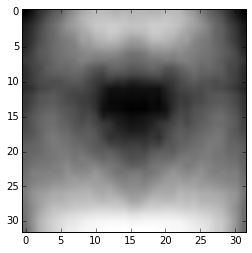

In [4]:
import caffe
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

blob = caffe.proto.caffe_pb2.BlobProto()
data = open('/home/ubuntu/notebook/mean.binaryproto','rb').read()
blob.ParseFromString(data)
arr = np.array(caffe.io.blobproto_to_array(blob))[0,:,:,:].mean(0)
plt.imshow(arr, cmap=cm.Greys_r)
plt.show()

##Task 2 - Training your network

We are now going to configure our network and start training.  For this exercise we will borrow our network architecture from the cifar10 design that is provided with Caffe.  You can find the original network in `$CAFFE_ROOT/examples/cifar10`. In the first class in this series "Introduction to Deep Learning on GPUs" we used this network to classify the CIFAR-10 images themselves.  The only modification we will make initially is to change the final output softmax layer, which does the actual classification, to only have two classes for our dogs and cats problem rather than the ten classes needed for the CIFAR data.

Below we see an image of the cifar10 network architecture.  Hopefully you will be familiar with this type of network diagram from your introduction to DIGITS in the last class.  As we can see the cifar10 network is a convolutional neural network (CNN) with three convolutional layers (each with pooling, ReLU activation and normalization) followed by a single fully-connected layer performing the final classification.

![](files/src/cifar.png)

We see that the network input data has dimensions 100x3x32x32. This means that we have batches of 100 training images each with three-channels, i.e. it's color, and 32x32 pixels.

The first convolutional layer applies 32 5x5 filters.  As the filters have size 5x5 we must pad the edges of the input input images with zeros to ensure that the output of the layer has the same size.

After the convolutional layer max pooling is applied to reduce the size of the output images by half, a rectified linear unit (ReLU) activation function is applied and local response normalization (LRN) is applied.

Layers 2 and 3 are convolutional layers repeating this pattern but gradually reducing the output size of the layers and using average pooling.  

The layers is a fully connected layer two neurons which together with the image labels feeds into a softmax layer which performs the classification and computes the classification loss.  The two final neurons in the output layer correspond to our two classes, dogs and cats.

Caffe encodes deep neural network architectures like this in text files called prototxt files.  You can see the corresponding cifar10 prototxt file, called `train_val.prototxt`, below.  As you will see, the file is human readable and it is easy to map the sections of the prototxt file to the network layers in the diagram above.  You can get more information about the types of layers that can be defined in a network prototxt file [here](http://caffe.berkeleyvision.org/tutorial/layers.html).

<iframe id="task2" src="/task2" width="100%" height="500px">
 <p>Your browser does not support iframes.</p>
</iframe>

We now have our datasets and a network configuration we are nearly ready to train the network.  The final thing that Caffe needs before we can train is a specification of the learning algorithm parameters.  This specification is also made in a prototxt file but with a simpler structure.  If you open the solver.prototxt file in the text editor above, you'll see it clearly specifying the learning parameters.  You can get more information about the range of parameters that can be set in a solver prototxt file [here](http://caffe.berkeleyvision.org/tutorial/solver.html).

We are now ready to train the network.  Again, this is carried out using a  command line tool that comes with Caffe, this time it is the binary `caffe` itself with the `train` option. Execute the cell below to begin training - it should take just under a minute to train - be sure to scroll down through the complete Caffe output.

In [5]:
%%bash
#Set the location of the caffe tools folder
TOOLS=/home/ubuntu/caffe/build/tools
#Train the network
$TOOLS/caffe train -gpu 0 -solver src/solver.prototxt

I0828 15:17:18.277583  2844 caffe.cpp:99] Use GPU with device ID 0
I0828 15:17:18.417570  2844 caffe.cpp:107] Starting Optimization
I0828 15:17:18.417754  2844 solver.cpp:32] Initializing solver from parameters: 
test_iter: 100
test_interval: 250
base_lr: 0.01
display: 20
max_iter: 750
lr_policy: "step"
gamma: 0.1
momentum: 0.9
weight_decay: 0.0005
stepsize: 500
snapshot: 250
snapshot_prefix: "checkpoints/snapshot"
solver_mode: GPU
net: "src/train_val.prototxt"
solver_type: SGD
I0828 15:17:18.417837  2844 solver.cpp:70] Creating training net from net file: src/train_val.prototxt
I0828 15:17:18.419575  2844 net.cpp:253] The NetState phase (0) differed from the phase (1) specified by a rule in layer data
I0828 15:17:18.419605  2844 net.cpp:253] The NetState phase (0) differed from the phase (1) specified by a rule in layer accuracy
I0828 15:17:18.419729  2844 net.cpp:42] Initializing net from parameters: 
state {
  phase: TRAIN
}
layer {
  name: "data"
  type: "Data"
  top: "data"
  top:

####Q #1: 
After 250, 500, and 750 iterations what is your training accuracy?

**A**: See [Answer #1 below](#Answer-#1)

It turns out that we can achieve much higher accuracy and a lower loss against both the training and validation datasets for this task. This means our network is *underfitting* the data.  Essentially, this means that our ability to approximate the function that maps raw images to dog and cat labels is constrained by the number of trainable parameters in our network.

##Task 3 - Modifying your Network

Many network configurations that you may have heard of such as Alexnet, GoogLeNet and VGG are significantly larger than the three layer architecture used above and have proven to be very accurate at classifying the ImageNet images.  You are going to increase the complexity of this network to improve the accuracy.

There are many knobs that one can turn in choosing a neural network architecture.  For example, you can add layers, increased the number of learned weights, change the learning rate or introduce a more complex policy to modify the learning rate as training progresses.  We will experiment with some of these modifications to see the effect on classificaiton accuracy.

First modify the network architecture in the `train_val2.protoxt` file below to increase the number of outputs in the convolutional layers to 64 for layer 1, 256 for layer 2 and 256 for layer 3.

Also modify the learning parameters in the `solver2.prototxt` file to decrease the learning rate to 0.005, while keeping everything else the same.

If you have any difficulties with making the right modifications you can find the answers in `train_val2.answer.prototxt` and `solver2.answer.prototxt`.

<iframe id="task3" src="/task3" width="100%" height="500px">
 <p>Your browser does not support iframes.</p>
</iframe>

Once you have saved your changes we can retrain the network by executing the cell below.  This time it will take about 90 seconds to train due to the increased network size. 

In [ ]:
%%bash
TOOLS=/home/ubuntu/caffe/build/tools
#Train your modified network configuration
$TOOLS/caffe train -gpu 0 -solver src/solver2.prototxt

You have now trained a network architecture with a much larger number of trainable parameters.

####Q #2:
Did you notice any performance improvements?  If so, what is your accuracy now?

**A**: See [Answer #2 below](#Answer-#2)

Good work, we are underfitting less.  Let's make one more modification to the network before training a final time.  In the last modification we increased the number of neurons in our convolutional layers.  Another way to increase the number of trainable parameters in our network is to make it deeper by adding more layers.  This time you should add two new fully-connected layers with 100 outputs each - call them `ip2` and `ip3`.  These layers should come after the third pooling layer, `pool3`, but **before** the existing fully-connected layer `ip1`.  In Caffe, fully-connected layers are implemented using the inner product layer construct.  After the new fully-connected (inner product) layer you also need a ReLU activation layer and a dropout layer.  The dropout layer will prevent the network from *overfitting*, i.e. getting really good at classifying the training data but not able to classify the validation data.

Here is what `ip2` should look like when inserted after `pool3`.  You'll need to modify the layer names to create `ip3` after `ip2`.

REMEMBER: Don't forget to change the input of your existing fully-connected layer `ip1` to be the output of the new layer `ip3`!

Modify the `train_val3.prototxt` file below by adding the new layers and then activate the subsequent cell to train one more time. Again, this model will take slightly longer to train due to the increased size.

Again, if you have any problems modifying the file, you can look at the answer in `train_val3.answer.prototxt`.

<iframe id="task3" src="/task3" width="100%" height="500px">
 <p>Your browser does not support iframes.</p>
</iframe>

In [6]:
%%bash
TOOLS=/home/ubuntu/caffe/build/tools
#Train your modified network configuration
$TOOLS/caffe train -gpu 0 -solver src/solver3.prototxt

I0828 15:19:13.167608  4007 caffe.cpp:99] Use GPU with device ID 0
I0828 15:19:13.291929  4007 caffe.cpp:107] Starting Optimization
I0828 15:19:13.292081  4007 solver.cpp:32] Initializing solver from parameters: 
test_iter: 100
test_interval: 250
base_lr: 0.01
display: 20
max_iter: 750
lr_policy: "step"
gamma: 0.1
momentum: 0.9
stepsize: 500
snapshot: 750
snapshot_prefix: "checkpoints/snapshot"
solver_mode: GPU
net: "src/train_val3.prototxt"
solver_type: SGD
I0828 15:19:13.292137  4007 solver.cpp:70] Creating training net from net file: src/train_val3.prototxt
I0828 15:19:13.292619  4007 net.cpp:253] The NetState phase (0) differed from the phase (1) specified by a rule in layer data
I0828 15:19:13.292655  4007 net.cpp:253] The NetState phase (0) differed from the phase (1) specified by a rule in layer accuracy
I0828 15:19:13.292790  4007 net.cpp:42] Initializing net from parameters: 
state {
  phase: TRAIN
}
layer {
  name: "data"
  type: "Data"
  top: "data"
  top: "label"
  include 

####Q #3:
What is the classification accuracy now?

**A**: See [Answer #3 below](#Answer-#3)

We have now seen two ways in which a model can be modified in Caffe to improve classication accuracy - adding more layers or increasing the number of neurons in existing layers.  There are many more ways to improve classification accuracy for you to explore and we will cover some of them in subsequent classes.

####Q #4:
What else might you do to improve classification accuracy?

**A**: See [Answer #4 below](#Answer-#4)

##Task 4  - Classification

We will now learn how to deploy our final trained network to perform classification of new images. For all of the training above we used the Caffe command line interface tools.  For classification we are going to use Caffe's Python interface.  We will first import the Python libraries we require and create some variables specifying the locations of important files.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

plt.rcParams['figure.figsize'] = (6.0, 4.0)

# Make sure that caffe is on the python path:
#caffe_root = '../'  # this file is expected to be in {caffe_root}/examples
import sys
#sys.path.insert(0, caffe_root + 'python')

import caffe

# Set the right path to your model definition file, pretrained model weights,
# and the image you would like to classify.
MODEL_FILE = '/home/ubuntu/notebook/src/deploy3.prototxt'
PRETRAINED = '/home/ubuntu/notebook/checkpoints/pretrained.caffemodel'
IMAGE_FILE1 = '/home/ubuntu/data/dog_cat/dog_cat_32/test/cat_236.jpg'
IMAGE_FILE2 = '/home/ubuntu/data/dog_cat/dog_cat_32/test/dog_4987.jpg'
LABELS_FILE = '/home/ubuntu/data/dog_cat/dog_cat_32/labels.txt'
labels=open(LABELS_FILE,'r').readlines()

Loading a network is easy. The `caffe.Classifier` method takes care of everything. Note the arguments for configuring input preprocessing: mean subtraction switched on by giving a mean array, input channel swapping takes care of mapping RGB into the reference ImageNet model's BGR order, and raw scaling multiplies the feature scale from the input [0,1] to the ImageNet model's [0,255].

In [8]:
# First we must import the mean.binaryproto mean image into a numpy array
blob = caffe.proto.caffe_pb2.BlobProto()
data = open( 'mean.binaryproto' , 'rb' ).read()
blob.ParseFromString(data)
arr = np.array( caffe.io.blobproto_to_array(blob) )
out = arr[0]

In [9]:
# Load our pretrained model
net = caffe.Classifier(MODEL_FILE, PRETRAINED,
                       mean=out,
                       channel_swap=(2,1,0),
                       raw_scale=255,
                       image_dims=(32, 32))
net2 = caffe.Classifier(MODEL_FILE, PRETRAINED,
                       mean=out,
                       channel_swap=(2,1,0),
                       raw_scale=255,
                       image_dims=(32, 32))

Let's take a look at our example images with Caffe's image loading helper. We are going to classify 2 different images, one from each category.

(<matplotlib.image.AxesImage at 0x7f80ceec4fd0>,
 <matplotlib.text.Text at 0x7f80cef1d710>)

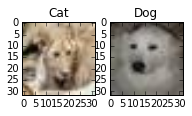

In [10]:
# Load two test images
input_image1 = caffe.io.load_image(IMAGE_FILE1)
input_image2 = caffe.io.load_image(IMAGE_FILE2)
# Display the test images
plt.subplot(1,4,1).imshow(input_image1),plt.title('Cat')
plt.subplot(1,4,2).imshow(input_image2),plt.title('Dog')

Time to classify. The default is to actually do 10 predictions, cropping the center and corners of the image as well as their mirrored versions, and average over the predictions.  This approach typically leads to better classification accuracy as it is more robust to object translation within in the image.

In [ ]:
prediction1 = net.predict([input_image1]) 
prediction2 = net2.predict([input_image2])
width=0.1
plt.bar(np.arange(2),prediction1[0],width,color='blue',label='Cat')
plt.bar(np.arange(2)+width,prediction2[0],width,color='green',label='Dog')
plt.xticks(np.arange(2)+width,labels)
plt.ylabel('Class Probability')
plt.legend()


You can see what class the neural network believes each image is. In the cases above the highest probabilities are given to the correct class for both test images. 

## Task 5 - Filter Visualization 

This portion of the lesson follows the filter visualization example provided with Caffe and the DeCAF visualizations originally developed by Yangqing Jia.

In this task you are going to visualize the network's response from the two images classified in Task 2. In a convolutional layer in a deep neural network the weights that connect the layer inputs to the outputs form a four-dimensional tensor.  You can think of this tensor as being a collection of small two-dimensional arrays with multiple channels (you could also think of each of these as a three-dimensional array).  It is these arrays which are convolved with the input to the layer to produce the layers output activations.  In our final network above the first convolutional layer had 64 three-channel 5x5 weights.  These small arrays are often referred to as (convolutional) *filters*.  When we convolve these filters with the layer input we obtain what are often referred to as *feature maps*.  In this task we will treat these network activations as images as this is often useful for understanding what the network has actually learned during the training process.

In [ ]:
#View a list of the network layer outputs and their dimensions
[(k, v.data.shape) for k, v in net.blobs.items()]

First you are going to visualize the filters of the first layer. 


In [ ]:
# take an array of shape (n, height, width) or (n, height, width, channels)
# and visualize each (height, width) thing in a grid of size approx. sqrt(n) by sqrt(n)
def vis_square(data, padsize=1, padval=0):
    data -= data.min()
    data /= data.max()
    
    # force the number of filters to be square
    n = int(np.ceil(np.sqrt(data.shape[0])))
    padding = ((0, n ** 2 - data.shape[0]), (0, padsize), (0, padsize)) + ((0, 0),) * (data.ndim - 3)
    data = np.pad(data, padding, mode='constant', constant_values=(padval, padval))
    
    # tile the filters into an image
    data = data.reshape((n, n) + data.shape[1:]).transpose((0, 2, 1, 3) + tuple(range(4, data.ndim + 1)))
    data = data.reshape((n * data.shape[1], n * data.shape[3]) + data.shape[4:])
    
    plt.imshow(data)

    # the parameters are a list of [weights, biases]

###########################################################################################################################
#TODO: All of the weights of the first layer are plotted below. Modify the filters parameter so that you can view some of 
#the weights more closely. Try looking at the first 10 and 20 filters.  
##########################################################################################################################
plt.rcParams['figure.figsize'] = (25.0, 20.0)
filters = net.params['conv1'][0].data
vis_square(filters.transpose(0, 2, 3, 1))

Now you are going to view the feature maps of the two input images after they have been processed by the first convolutional layer. Feel free to modify the feat variables so that you can take a closer look as some of the feature maps more closely. Notice the visual similarities and differences between the features maps of both of these images.

In [ ]:
feat = net.blobs['conv1'].data[0,:64]
plt.subplot(1,2,1),plt.title('Cat')
vis_square(feat, padval=1)
net.blobs['conv1'].data.shape
feat2 = net2.blobs['conv1'].data[0, :64]
plt.subplot(1,2,2),plt.title('Dog')
vis_square(feat2, padval=1)

Do you see many differences between the networks responses for the two different input images?

Now view the feature maps from the 2nd convolutional layer.

In [ ]:
feat = net.blobs['conv2'].data[0]
plt.subplot(1,2,1),plt.title('Cat')
vis_square(feat, padval=1)
feat2 = net2.blobs['conv2'].data[0]
plt.subplot(1,2,2),plt.title('Dog')
vis_square(feat2, padval=1)

Now view the feature map of the last convolutional layer and then the pooled version.

In [ ]:
feat = net.blobs['conv3'].data[0]
plt.subplot(1,2,1),plt.title('Cat')
vis_square(feat, padval=0.5)
feat2 = net2.blobs['conv3'].data[0]
plt.subplot(1,2,2),plt.title('Dog')
vis_square(feat2, padval=0.5)

In [ ]:
feat = net.blobs['pool3'].data[0,:100]
plt.subplot(1,2,1),plt.title('Cat')
vis_square(feat, padval=1)
feat2 = net2.blobs['pool3'].data[0,:100]
plt.subplot(1,2,2),plt.title('Dog')
vis_square(feat2, padval=1)

Now view the neuron activations for the fully-connected layer ip2. You will notice that the neurons being activated by the two input images are very different. This is good as it means the network is effectively differentiating the two images at the higher layers in the network.

In [ ]:
feat = net.blobs['ip2'].data[0]
plt.plot(feat.flat,label='Cat')
plt.legend()
plt.show()
##########################################################################################################################
# Plot ip2 for the input image of the Dog image. Compare the Differences 
feat2 = net2.blobs['ip2'].data[0]
plt.plot(feat2.flat, label='Dog')
plt.legend()

##Task 6 - Classifying Many Images

A text file containing a list of 20 images being stored on this host machine is provided. By executing the cell below you will classify all of these images with the network you trained above and calculate the mean accuracy.

In [ ]:
TEST_FILE=open('/home/ubuntu/data/dog_cat/dog_cat_32/val/test.txt','r') 
TEST_IMAGES=TEST_FILE.readlines()
PredictScore=np.zeros((len(TEST_IMAGES),1))
for i in range(len(TEST_IMAGES)):
    IMAGE_FILE='/home/ubuntu/data/dog_cat/dog_cat_32/val/' + TEST_IMAGES[i].split()[0]
    CATEGORY=TEST_IMAGES[i].split()[1]
    #print TEST_IMAGES[i]
    input_test = caffe.io.load_image(IMAGE_FILE)
    prediction = net2.predict([input_test])  
    #print prediction[0]
    if prediction[0].argmax()==int(CATEGORY):
        print 'CORRECT -- predicted class for ', str(IMAGE_FILE[62:]),':', prediction[0].argmax(), 'true class:', CATEGORY
    elif prediction[0].argmax()!=int(CATEGORY):
        print 'WRONG -- predicted class ', str(IMAGE_FILE[62:]),':', prediction[0].argmax(), 'true class:', CATEGORY            
    PredictScore[i]=int(prediction[0].argmax()==int(CATEGORY))
Accuracy=np.sum(PredictScore)/len(PredictScore)
print 'Prediction accuracy with this image set is', np.sum(PredictScore)/len(PredictScore)

## Post-Lab Summary

If you would like to download this lab for later viewing, it is recommend you go to your browsers File menu (not the Jupyter notebook file menu) and save the complete web page.  This will ensure the images are copied down as well.

## More information

For more information on using Caffe, visit http://caffe.berkeleyvision.org/. A description of the framework, how to use it, and plenty of examples similar to this lesson are posted. 

To learn more about these other topics, please visit:
* GPU accelerated machine learning: [http://www.nvidia.com/object/machine-learning.html](http://www.nvidia.com/object/machine-learning.html)
* Theano: [http://deeplearning.net/software/theano/](http://deeplearning.net/software/theano/)
* Torch: [http://torch.ch/](http://torch.ch/)
* DIGITS: [https://developer.nvidia.com/digits](https://developer.nvidia.com/digits)
* cuDNN: [https://developer.nvidia.com/cudnn](https://developer.nvidia.com/cudnn)

### Deep Learning Lab Series

Make sure to check out the rest of the classes in this Deep Learning lab series.  You can find them [here](https://developer.nvidia.com/deep-learning-courses).

## Lab Answers

### Answer #1
About 60% after 250, 65% after 500 and 69% after 750

[Return to question](#Q-#1:)

### Answer #2
You should see an improvement to over 70%

[Return to question](#Q-#2:)

### Answer #3
Over 73%

[Return to question](#Q-#3:)

### Answer #4
Increase network size, change activation functions, modify training algorithm, data augmentation

[Return to question](#Q-#4:)